# db2Dean's Jupyter Notebook Article
This notebook shows examples of using a Jupyter Notebook as a Db2 Client.  Some of the content was greated by me, but all of the really good documentation was created by George Baklarz and his team.  Thank you George!

#### Start by running the db2.ipynb command and then connecting to a database


In [2]:
%run db2.ipynb

Pixiedust database opened successfully


DB2 Extensions Loaded.


In [ ]:
%sql CONNECT TO BLUDB USER dash100200 USING passw0rd HOST awh-yp-small03.services.dal.bluemix.net PORT 50000

In [ ]:
%sql CONNECT TO sample USER db2inst1 USING passw0rd HOST 10.0.183.46 PORT 50000

In [44]:
%sql CONNECT TO sample USER db2inst1 USING ? HOST 192.168.0.8 PORT 50000

Password [password]: ········
Connection successful.


In [ ]:
%sql CONNECT RESET

In [12]:
%sql SELECT COUNT(*) FROM syscat.indexes

1
0  435

## SQL Examples
Once connected to a database is is easy to run SQL and see your 
output right in the notebook.

In [15]:
%sql SELECT empno,lastname FROM employee WHERE empno = '000010'

EMPNO LASTNAME
0  000010     HAAS

In [16]:
empno = '000010'
%sql SELECT empno,lastname FROM employee WHERE empno = '{empno}'

EMPNO LASTNAME
0  000010     HAAS

In [17]:
%sql SELECT lastname FROM employee \
        WHERE empno = '{empno}'

LASTNAME
0     HAAS

In [20]:
%%sql
SELECT empno, lastname, job, phoneno
-- show that the normal sql comment syntax works too.  
    FROM employee
ORDER BY lastname
FETCH FIRST 3 ROWS ONLY;

EMPNO LASTNAME       JOB PHONENO
0  000150  ADAMSON  DESIGNER    4510
1  200340   ALONZO  FIELDREP    5698
2  000200    BROWN  DESIGNER    4501

## Options
Both forms of the **`%sql`** command have options that can be used to change the behavior of the code. For both forms of the command (**`%sql`**, **`%%sql`**), the options must be on the same line as the command:
<pre>
%sql -t ...
%%sql -t
</pre>

The only difference is that the **`%sql`** command can have SQL following the parameters, while the **`%%sql`** requires the SQL to be placed on subsequent lines.

There are a number of parameters that you can specify as part of the %sql statement. 

* **`-d`** - Use alternative delimiter
* **`-t`** - Time the statement execution
* **`-n`** - Run all statements as commands (no answer sets)
* **`-s`** - Run all statements as SQL
* **`-q`** - Suppress messages 
* **`-j`** - JSON formatting of a column
* **`-a`** - Show all output
* **`-pb`** - Bar chart of results
* **`-pp`** - Pie chart of results 
* **`-pl`** - Line chart of results
* **`-i`** - Interactive results and plotting
* **`-sampledata`** Load the database with the sample EMPLOYEE and DEPARTMENT tables
* **`-r`** - Return the results into a variable (list of rows)

Multiple parameters are allowed on a command line. Each option should be separated by a space:
<pre>
%sql -a -j ...
</pre>

A SELECT statement will return the results as a dataframe and display the results as a table in the notebook. If you use the assignment statement, the dataframe will be placed into the variable and the results will not be displayed:
<pre>
r = %sql SELECT * FROM EMPLOYEE
</pre>

The sections below will explain the options in more detail.

### Plotting
Sometimes it would be useful to display a result set as either a bar, pie, or line chart. The first one or two
columns of a result set need to contain the values need to plot the information.

The three possible plot options are:
    
* **`-pb`** - bar chart (x,y)
* **`-pp`** - pie chart (y)
* **`-pl`** - line chart (x,y)

One additional method for plotting data is through an interactive mode.

- **`-i`** - interactive mode

The data that we are plotting is based on the average salaries of employees across the entire company.

## Watt Hour Production over 2 Years
Use the -pl parameter to creat a line graph of production.

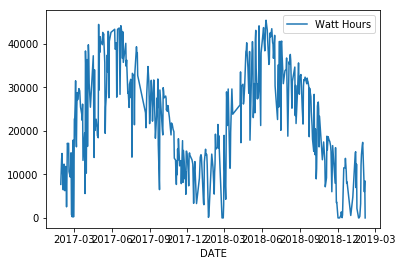

In [37]:
%%sql -pl
    select date(reading_ts) Date, sum(nbr_wh) "Watt Hours"
       from json.v_energy_hour  
        group by date(reading_ts)

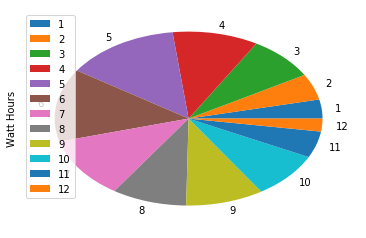

In [42]:
%%sql -pp
    select month(reading_ts) "Month"
           , sum(nbr_wh) "Watt Hours"
       from json.v_energy_hour  
        group by month(reading_ts)

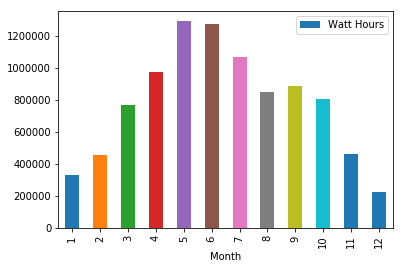

In [43]:
%%sql -pb
    select month(reading_ts) "Month"
           , sum(nbr_wh) "Watt Hours"
       from json.v_energy_hour  
        group by month(reading_ts)

### Use Db2 data in a script 
Generate RUNSTATS commands from SQL and run them.

In [19]:
# First get the TABSCHEMA and TABNAME columns
# into the variable tables
tables = %sql -r SELECT tabschema, tabname \
     from syscat.tables where type = 'T' and OWNERTYPE = 'U' \
      and tabschema not like 'SYS%' fetch first 5 rows only

# Then print values of the first 3 rows of output
# Notice that row 0 is the column names
print(tables[0][0], tables[0][1])
print(tables[1][0], tables[1][1])
print(tables[2][0], tables[2][1])

TABSCHEMA TABNAME
DB2INST1 CL_SCHED
DB2INST1 DEPARTMENT


In [20]:
# Use the "len" function to see how many rows were retrieved
print(len(tables))

6


In [34]:
# Now iterate through the output rows generating the 
# RUNSTATS command in the variable "command"
# and then executing and printing the command
rowno = 0
runstats_script = ""
for row in tables:
    if (rowno != 0):
        # Note that the back slash is just to continue the concatenation
        # Use the strip() function to remove leading and trailing blanks
        command = "CALL sysproc.admin_cmd('RUNSTATS ON TABLE " + \
                tables[rowno][0].strip() + \
                "." + tables[rowno][1] + " SHRLEVEL CHANGE')"
        %sql {command}
        print(command)
    rowno = rowno + 1

CALL sysproc.admin_cmd('RUNSTATS ON TABLE DB2INST1.CL_SCHED SHRLEVEL CHANGE')
CALL sysproc.admin_cmd('RUNSTATS ON TABLE DB2INST1.DEPARTMENT SHRLEVEL CHANGE')
CALL sysproc.admin_cmd('RUNSTATS ON TABLE JSON.WEATHER_JSON SHRLEVEL CHANGE')
CALL sysproc.admin_cmd('RUNSTATS ON TABLE DB2INST1.TYPES SHRLEVEL CHANGE')
CALL sysproc.admin_cmd('RUNSTATS ON TABLE JSON.JSON_DEPT SHRLEVEL CHANGE')
